In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

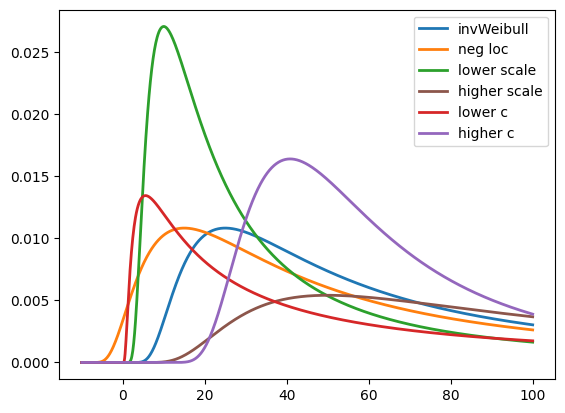

In [21]:
# inverse Weibull distribution: pdf: f(x, c) = c * x**(-c-1) * exp(-x**-c)
# invweibull.pdf(x, c, loc, scale) = c * ((x - loc) / scale)**(-c-1) * exp(- ((x - loc) / scale)**-c)

# Specifically, invweibull.pdf(x, c, loc, scale) is identically equivalent to invweibull.pdf(y, c) / scale with y = (x - loc) / scale.

# c is the shape parameter
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.invweibull.html#scipy.stats.invweibull

x = np.linspace(-10, 100, 1000)

dist = stats.invweibull(
    1,
    loc=0,
    scale=50)
plt.plot(x, dist.pdf(x), lw=2, c='tab:blue', label='invWeibull')

dist = stats.invweibull(
    1,
    loc=-10,
    scale=50)
plt.plot(x, dist.pdf(x), lw=2, c='tab:orange', label='neg loc')

dist = stats.invweibull(
    1,
    loc=0,
    scale=20)
plt.plot(x, dist.pdf(x), lw=2, c='tab:green', label='lower scale')

dist = stats.invweibull(
    1,
    loc=0,
    scale=100)
plt.plot(x, dist.pdf(x), lw=2, c='tab:brown', label='higher scale')

dist = stats.invweibull(
    0.5,
    loc=0,
    scale=50)
plt.plot(x, dist.pdf(x), lw=2, c='tab:red', label='lower c')

dist = stats.invweibull(
    2,
    loc=0,
    scale=50)
plt.plot(x, dist.pdf(x), lw=2, c='tab:purple', label='higher c')

plt.legend()
plt.show()
plt.close()

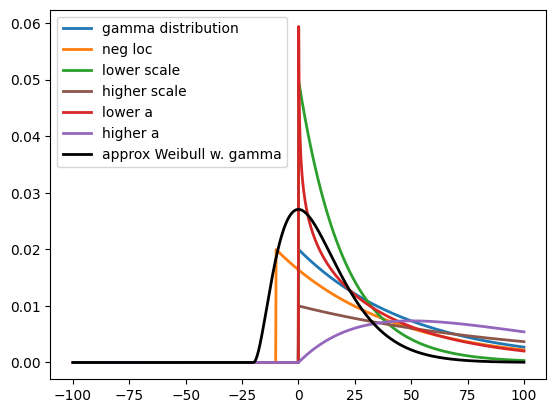

In [70]:
# Gamma distribution: f(x, a) = x**(a-1) * exp(-x) / gamma(a)
# gamma function: gamma(a) = integral(0, inf, x**(a-1) * exp(-x) dx)

# a is the shape parameter

# gamma with two parameters a and b: f(x, a, b) = b**a * x**(a-1) * exp(-b*x) / gamma(a)
# scale = 1 / b

x = np.linspace(-100, 100, 1000)

dist = stats.gamma(
    1,
    loc=0,
    scale=50)
plt.plot(x, dist.pdf(x), c = 'tab:blue', lw=2, label='gamma distribution')

dist = stats.gamma(
    1,
    loc=-10,
    scale=50)
plt.plot(x, dist.pdf(x), c = 'tab:orange', lw=2, label='neg loc')

dist = stats.gamma(
    1,
    loc=0,
    scale=20)
plt.plot(x, dist.pdf(x), c = 'tab:green', lw=2, label='lower scale')

dist = stats.gamma(
    1,
    loc=0,
    scale=100)
plt.plot(x, dist.pdf(x), c = 'tab:brown', lw=2, label='higher scale')

dist = stats.gamma(
    0.8,
    loc=0,
    scale=50)
plt.plot(x, dist.pdf(x), c = 'tab:red', lw=2, label='lower a')

dist = stats.gamma(
    2,
    loc=0,
    scale=50)
plt.plot(x, dist.pdf(x), c = 'tab:purple', lw=2, label='higher a')

loc = -20
scale = 10
dist = stats.gengamma(1-(loc/scale),1,loc=loc, scale=scale)
plt.plot(x, dist.pdf(x), 'k-', lw=2, label='approx Weibull w. gamma')

plt.legend()
plt.show()
plt.close()


In [37]:
# get the parameters of a distribution

invWeibull_dist = stats.invweibull(
    1,
    loc=0,
    scale=50)

invWeibull_dist_params = {
    'args': invWeibull_dist.args, 
    'kwds': invWeibull_dist.kwds
}

loaded_invWeibull_dist = stats.invweibull(
    *invWeibull_dist_params['args'], 
    **invWeibull_dist_params['kwds'])

gamma_dist = stats.gamma(
    1,
    loc=0,
    scale=50)

gamma_dist_params = {
    'args': gamma_dist.args, 
    'kwds': gamma_dist.kwds
}

loaded_gamma_dist = stats.gamma(
    *gamma_dist_params['args'], 
    **gamma_dist_params['kwds'])

In [46]:
loaded_gamma_dist

In [60]:
dist_name = invWeibull_dist.dist.name
loaded_invWeibull_dist = getattr(sp.stats, dist_name)(invWeibull_dist_params['args'], **invWeibull_dist_params['kwds'])
loaded_invWeibull_dist.pdf(10)

array([0.00336897])

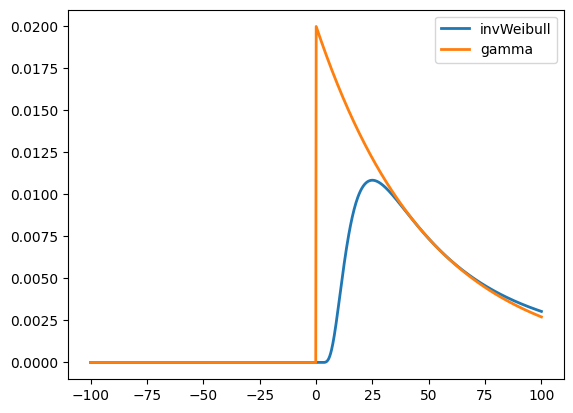

In [61]:
plt.plot(x, loaded_invWeibull_dist.pdf(x), lw=2, c='tab:blue', label='invWeibull')
plt.plot(x, loaded_gamma_dist.pdf(x), lw=2, c = 'tab:orange', label='gamma')
plt.legend()
plt.show()
plt.close()